# INF-510, Claudio Torres, claudio.torres@usm.cl, DI-UTFSM
## Textbook: Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM, Philadelphia, 2000

# Spectral differentiation++

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy.linalg import toeplitz # type: ignore
from ipywidgets import interact # type: ignore

sym.init_printing()

FS = 20
plt.rcParams.update({
    'font.size': FS,
    'text.usetex': True,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'xtick.labelsize': FS,
    'ytick.labelsize': FS,
    'axes.labelsize': FS,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

def plot_matrices_with_values(ax,M, flag_numbers=True):
    N=M.shape[0]
    cmap = plt.get_cmap('GnBu')
    ax.matshow(M, cmap=cmap)
    if flag_numbers:
        for i in np.arange(0, N):
            for j in np.arange(0, N):
                ax.text(i, j, r'${:.2f}$'.format(M[i,j]), va='center', ha='center', color='r')

Defining some symbolic variables

In [2]:
N = 10
y = sym.Symbol('y', real=True)
f = sym.exp(sym.sin(sym.pi*y))
fv = sym.lambdify([y], f, 'numpy')
fp = sym.diff(f)
fpv = sym.lambdify([y], fp, 'numpy')
fp2 = sym.diff(fp)
fp2v = sym.lambdify([y], fp2, 'numpy')
# We remove the first point since we consider periodic boundary conditions
x = np.linspace(-1,1,N+1)[1:]
xx = np.linspace(-1,1,10*N)
u = fv(x)

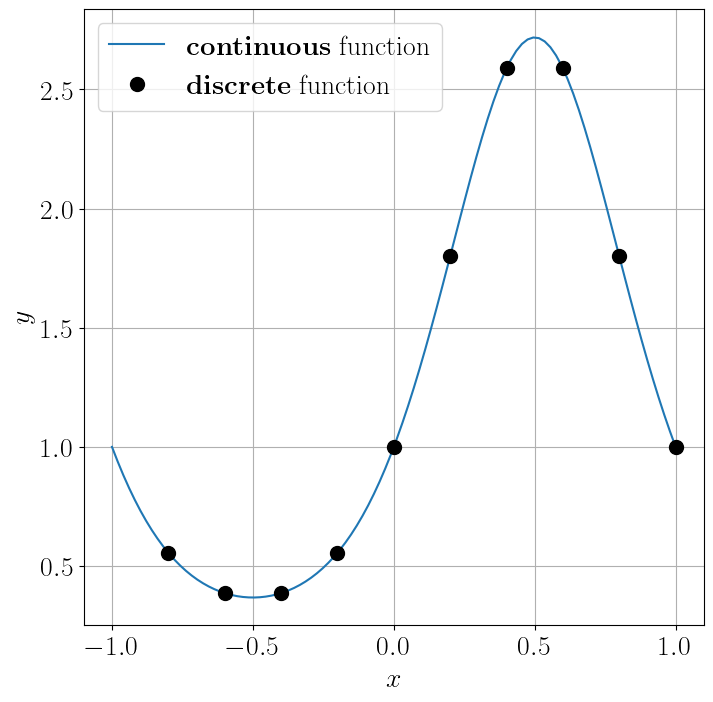

In [3]:
# The variable M is used for changing the default size of the figures
M=8
plt.figure(figsize=(M,M))
# This plots the "continuous" function
plt.plot(xx,fv(xx),'-',label=r'$\mathrm{\mathbf{continuous}\ function}$')
# This plots the "discrete" function
plt.plot(x,u,'k.',markersize=20,label=r'$\mathrm{\mathbf{discrete}\ function}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.legend(loc=2)
plt.show()

## My First Differentiation Matrix

In [4]:
def my_D(N):
    h=2./(N)
    c=np.zeros(N)
    c[1]=-1
    c[-1]=1
    D=toeplitz(c/(2.*h),r=-c/(2.*h))
    return D    
def show_my_D(N, flag_numbers=True):
    D=my_D(N)
    h = 2./N
    
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D*h, flag_numbers)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D)*(h)**2, flag_numbers)
    plt.show()
    
interact(show_my_D, N=(2,10))

interactive(children=(IntSlider(value=6, description='N', max=10, min=2), Checkbox(value=True, description='fl…

<function __main__.show_my_D(N, flag_numbers=True)>

## Let's differentiate our discrete function!

In [5]:
def show_discrete_derivate(N=10):
    D   = my_D(N)
    x   = np.linspace(-1,1,N+1)[1:]
    xx  = np.linspace(-1,1,10*N)
    u   = fv(x)
    plt.figure(figsize=(M,M))
    # This is the "exact" derivative
    plt.plot(xx,fpv(xx),'-',label=r'$\mathrm{\mathbf{exact}\ derivative}$')
    # Here we differentiate our "discrete" function
    Up=np.dot(D,u)
    plt.plot(x,Up,'k.',markersize=20,label=r'$\mathrm{\mathbf{discrete}\ derivative}$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title(r'$\mathrm{Is\ it\ a\ good\ approximation?}$')
    plt.show()
interact(show_discrete_derivate,N=(5,100,2))

interactive(children=(IntSlider(value=10, description='N', min=5, step=2), Output()), _dom_classes=('widget-in…

<function __main__.show_discrete_derivate(N=10)>

## Let's compute the second derivate!

In [6]:
def show_discrete_2nd_derivate(N=10):
    D   = my_D(N)
    D2  = np.dot(D,D)
    x   = np.linspace(-1,1,N+1)[1:]
    xx  = np.linspace(-1,1,10*N)
    u   = fv(x)
    plt.figure(figsize=(M,M))
    plt.plot(xx,fp2v(xx),'-',label=r'$\mathrm{\mathbf{exact}\ 2nd\ derivative}$')
    plt.plot(x,np.dot(D2,u),'k.',markersize=20,label=r'$\mathrm{\mathbf{discrete}\ 2nd\ derivative}$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.grid(True)
    plt.legend(loc='best')
    plt.title(r'$\mathrm{Is\ it\ a\ good\ approximation?}$')
    plt.show()
interact(show_discrete_2nd_derivate,N=(5,100,1))

interactive(children=(IntSlider(value=10, description='N', min=5), Output()), _dom_classes=('widget-interact',…

<function __main__.show_discrete_2nd_derivate(N=10)>

## Let's study how fast our approximation converges.

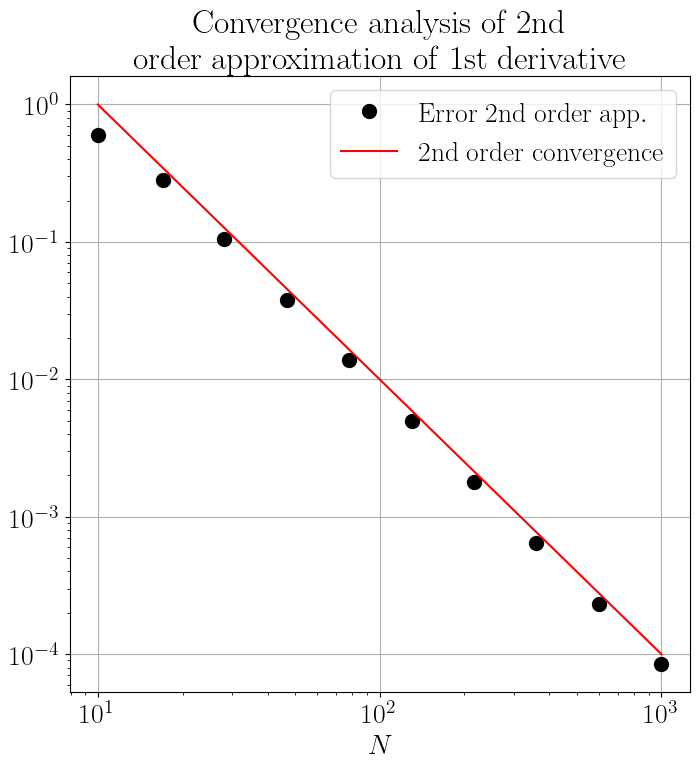

In [7]:
Ne = 10
errors=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3,Ne))
for i in np.arange(Ne):
    N = int(Ns[i])
    D = my_D(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,ord=np.inf)
plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20,label=r'$\mathrm{Error\ 2nd\ order\ app.}$')
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20,label=r'$\mathrm{2nd\ order\ convergence}$')
plt.xlabel(r'$N$')
plt.grid(True)
plt.title(r'$\mathrm{Convergence\ analysis\ of\ 2nd}$'+'\n'+r'$\mathrm{order\ approximation\ of\ 1st\ derivative}$')
plt.legend(loc='best')
plt.show()

## Can we find an approximation with a better convergence?

In [8]:
def my_D4th(N):
    h=2./N
    c=np.zeros(N)
    c[1]=-2./3.
    c[2]=1./12.
    c[-1]=2./3.
    c[-2]=-1./12.
    D=toeplitz(c/h,r=-c/h)
    return D
def show_my_D4th(N, flag_numbers=True):
    D=my_D4th(N)
    h = 2./N
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D*h, flag_numbers)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D)*(h)**2, flag_numbers)
    plt.show()
interact(show_my_D4th,N=(3,10,1))

interactive(children=(IntSlider(value=6, description='N', max=10, min=3), Checkbox(value=True, description='fl…

<function __main__.show_my_D4th(N, flag_numbers=True)>

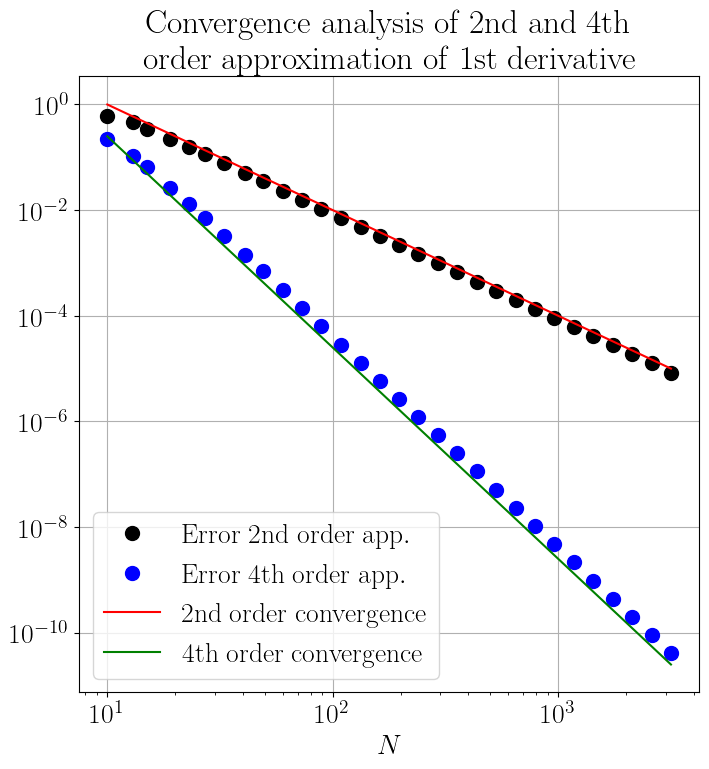

In [9]:
Ne = 30
errors=np.zeros(Ne)
errors4th=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3.5,Ne))
for i in np.arange(Ne):
    N = int(Ns[i])
    D = my_D(N)
    D4th = my_D4th(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    Up4th = np.dot(D4th,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
    errors4th[i] = np.linalg.norm(Up4th-up,np.inf)

plt.figure(figsize=(M,M))
plt.title(r'$\mathrm{Convergence\ analysis\ of\ 2nd\ and\ 4th}$'+'\n'+r'$\mathrm{order\ approximation\ of\ 1st\ derivative}$')
plt.loglog(Ns,errors,'k.',markersize=20,label=r'$\mathrm{Error\ 2nd\ order\ app.}$')
plt.loglog(Ns,errors4th,'b.',markersize=20,label=r'$\mathrm{Error\ 4th\ order\ app.}$')
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20, label=r'$\mathrm{2nd\ order\ convergence}$')
plt.loglog(Ns,2500*Ns**(-4),'g',markersize=20, label=r'$\mathrm{4th\ order\ convergence}$')
plt.xlabel(r'$N$')
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Can we find something even better?

In [10]:
def my_D_spec(N):
    h=(2./N)*np.pi
    c=np.zeros(N)
    j=np.arange(1,N)
    c[1:]=0.5*((-1)**j)*(np.tan(j*h/2.)**(-1))
    r=np.zeros(N)
    r[0]=c[0]
    r[1:]=c[-1:0:-1]
    D=np.pi*toeplitz(c,r=r)
    return D
def  show_my_D_spec(N, flag_numbers=True):
    D=my_D_spec(N)
    h = 2./N
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D*h, flag_numbers)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D)*(h)**2, flag_numbers)
    plt.show()
interact(show_my_D_spec,N=(3,10,1))

interactive(children=(IntSlider(value=6, description='N', max=10, min=3), Checkbox(value=True, description='fl…

<function __main__.show_my_D_spec(N, flag_numbers=True)>

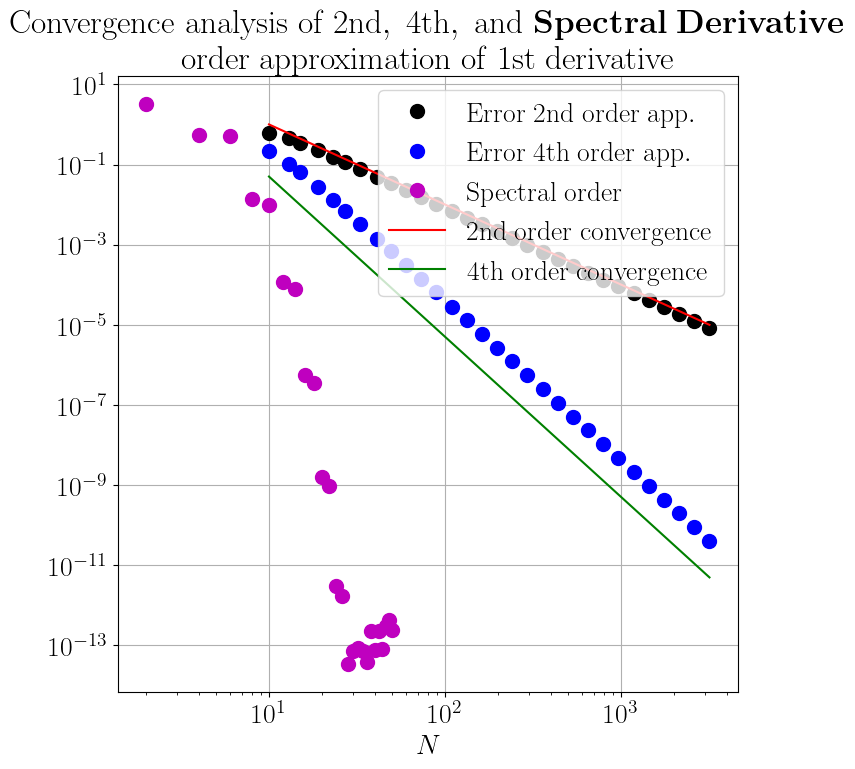

In [11]:
Ne = 30
errors=np.zeros(Ne)
errors4th=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3.5,Ne))
for i in np.arange(Ne):
    N = int(Ns[i])
    D = my_D(N)
    D4th = my_D4th(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    Up4th = np.dot(D4th,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
    errors4th[i] = np.linalg.norm(Up4th-up,np.inf)
    
NsS = np.ceil(np.arange(2,51,2))
NeS= NsS.shape[0]
errorsSpectral=np.zeros(NeS)
for i in np.arange(NeS):
    N = int(NsS[i])
    DSpectral = my_D_spec(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    UpSpectral = np.dot(DSpectral,u)
    up = fpv(x)
    errorsSpectral[i] = np.linalg.norm(UpSpectral-up,np.inf)    

plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20, label=r'$\mathrm{Error\ 2nd\ order\ app.}$')
plt.loglog(Ns,errors4th,'b.',markersize=20, label=r'$\mathrm{Error\ 4th\ order\ app.}$')
plt.loglog(NsS,errorsSpectral,'m.',markersize=20, label=r'$\mathrm{Spectral\ order}$')
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20, label=r'$\mathrm{2nd\ order\ convergence}$')
plt.loglog(Ns,500*Ns**(-4),'g',markersize=20, label=r'$\mathrm{4th\ order\ convergence}$')
plt.xlabel(r'$N$')
plt.grid(True)
plt.legend(loc='upper right')
plt.title(r'$\mathrm{Convergence\ analysis\ of\ 2nd,\ 4th,\ and\ \mathbf{Spectral\ Derivative}}$'+'\n'+r'$\mathrm{order\ approximation\ of\ 1st\ derivative}$')
plt.show()

# Bonus

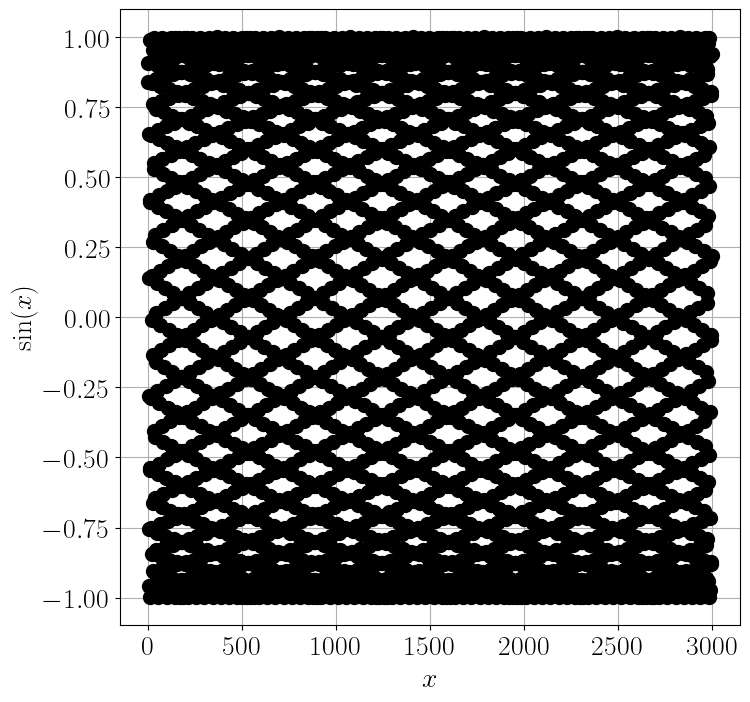

In [12]:
x=np.arange(1,3001)
plt.figure(figsize=(M,M))
plt.plot(x,np.sin(x),'k.',markersize=20)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')
plt.grid(True)
plt.show()

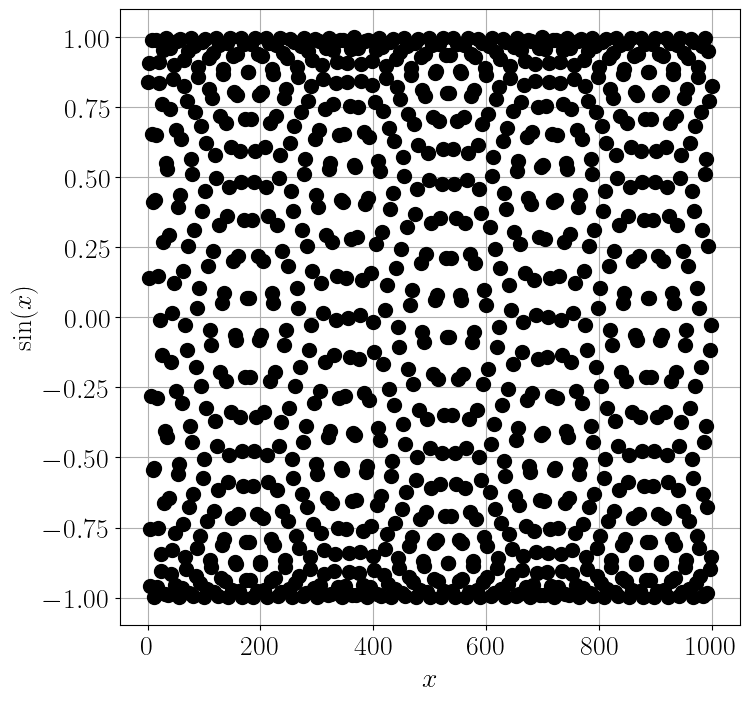

In [13]:
x=np.arange(1,1001)
plt.figure(figsize=(M,M))
plt.plot(x,np.sin(x),'k.',markersize=20)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin(x)$')
plt.grid(True)
plt.show()